In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Datasets/KenPom Barttorvik.csv")
df

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,BADJT RANK,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK
0,2024,MAC,17,61,1,1079,2,Akron,14,64,...,276,238,199,19,176,164,47,122,51,249
1,2024,SEC,28,63,3,1078,3,Alabama,4,4,...,13,33,8,156,106,10,314,2,263,7
2,2024,P12,24,63,3,1077,8,Arizona,2,16,...,16,50,37,196,7,195,134,8,14,47
3,2024,SEC,28,64,4,1076,12,Auburn,4,64,...,58,86,76,127,69,59,284,12,8,69
4,2024,B12,7,63,3,1075,14,Baylor,3,32,...,274,31,22,304,34,97,254,15,155,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,BE,8,1,1,5,235,West Virginia,7,16,...,225,18,115,181,61,209,16,22,32,49
1075,2008,SB,26,1,1,4,236,Western Kentucky,12,16,...,111,160,179,55,131,127,214,27,28,203
1076,2008,BSth,10,4,4,3,239,Winthrop,13,64,...,301,231,206,89,236,339,190,170,12,179
1077,2008,B10,6,3,3,2,240,Wisconsin,3,16,...,301,51,35,98,12,118,117,60,2,57


In [3]:
# Define conditions and corresponding values
conditions = [
    (df['ROUND'] == 1),
    (df['ROUND'] == 2),
    (df['ROUND'] == 4),
    (df['ROUND'] == 8),
    (df['ROUND'] == 16),
    (df['ROUND'] == 32),
    (df['ROUND'] == 64)
]

values = [6, 5, 4, 3, 2, 1, 0]

# Create a new column based on conditions
df['WINS'] = np.select(conditions, values, default=None)
df

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK,WINS
0,2024,MAC,17,61,1,1079,2,Akron,14,64,...,238,199,19,176,164,47,122,51,249,0
1,2024,SEC,28,63,3,1078,3,Alabama,4,4,...,33,8,156,106,10,314,2,263,7,4
2,2024,P12,24,63,3,1077,8,Arizona,2,16,...,50,37,196,7,195,134,8,14,47,2
3,2024,SEC,28,64,4,1076,12,Auburn,4,64,...,86,76,127,69,59,284,12,8,69,0
4,2024,B12,7,63,3,1075,14,Baylor,3,32,...,31,22,304,34,97,254,15,155,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,BE,8,1,1,5,235,West Virginia,7,16,...,18,115,181,61,209,16,22,32,49,2
1075,2008,SB,26,1,1,4,236,Western Kentucky,12,16,...,160,179,55,131,127,214,27,28,203,2
1076,2008,BSth,10,4,4,3,239,Winthrop,13,64,...,231,206,89,236,339,190,170,12,179,0
1077,2008,B10,6,3,3,2,240,Wisconsin,3,16,...,51,35,98,12,118,117,60,2,57,2


In [4]:
df.shape

(1079, 104)

In [5]:
df_train = df[df['YEAR'] != 2024]
df_train = df_train[df_train['ROUND'] != 68]
df_test = df[df['YEAR'] == 2024]
df_test = df_test[df_test['ROUND'] != 68]


In [6]:
X_train = df_train.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND','WINS'], axis=1)
y_train = df_train['WINS']
X_test = df_test.drop(['TEAM', 'CONF','CONF ID','QUAD NO', 'QUAD ID','TEAM NO','TEAM ID','ROUND','YEAR','ROUND','WINS'], axis=1)  
y_test = df_test['WINS']

In [7]:
X_train.columns

Index(['SEED', 'K TEMPO', 'K TEMPO RANK', 'KADJ T', 'KADJ T RANK', 'K OFF',
       'KO RANK', 'KADJ O', 'KADJ O RANK', 'K DEF', 'KD RANK', 'KADJ D',
       'KADJ D RANK', 'KADJ EM', 'KADJ EM RANK', 'BADJ EM', 'BADJ O', 'BADJ D',
       'BARTHAG', 'GAMES', 'W', 'L', 'WIN%', 'EFG%', 'EFG%D', 'FTR', 'FTRD',
       'TOV%', 'TOV%D', 'OREB%', 'DREB%', 'OP OREB%', 'OP DREB%', 'RAW T',
       '2PT%', '2PT%D', '3PT%', '3PT%D', 'BLK%', 'BLKED%', 'AST%', 'OP AST%',
       '2PTR', '3PTR', '2PTRD', '3PTRD', 'BADJ T', 'AVG HGT', 'EFF HGT', 'EXP',
       'TALENT', 'FT%', 'OP FT%', 'PPPO', 'PPPD', 'ELITE SOS', 'WAB',
       'BADJ EM RANK', 'BADJ O RANK', 'BADJ D RANK', 'BARTHAG RANK',
       'EFG% RANK', 'EFGD% RANK', 'FTR RANK', 'FTRD RANK', 'TOV% RANK',
       'TOV%D RANK', 'OREB% RANK', 'DREB% RANK', 'OP OREB% RANK',
       'OP DREB% RANK', 'RAW T RANK', '2PT% RANK', '2PT%D RANK', '3PT% RANK',
       '3PT%D RANK', 'BLK% RANK', 'BLKED% RANK', 'AST% RANK', 'OP AST% RANK',
       '2PTR RANK', '3PTR RA

In [8]:
# Fit 
model = LinearRegression()
model.fit(X_train, y_train)
R2train = model.score(X_train, y_train)
print("Train R^2 score:", R2train)
# Predict
y_pred = model.predict(X_test)
# Score
R2 = model.score(X_test, y_test)
print("Test R^2 score:", R2)


Train R^2 score: 0.4377871862522732
Test R^2 score: 0.37050628479185665


In [9]:
predictions_df = pd.DataFrame({'TEAM':df_test['TEAM'],'Target':y_test, 'Predicted':y_pred})
predictions_df

,TEAM,Target,Predicted
0,Akron,0,0.618652
1,Alabama,4,1.239445
2,Arizona,2,2.367600
3,Auburn,0,1.715501
4,Baylor,1,1.090233
...,...,...,...
63,Wagner,0,0.647316
64,Washington St.,1,1.116079
65,Western Kentucky,0,0.064551
66,Wisconsin,0,1.528193


In [10]:
predictions_df['MSE'] = (predictions_df['Target']-predictions_df['Predicted'])**2
predictions_df.sort_values(by='MSE')

,TEAM,Target,Predicted,MSE
33,McNeese St.,0,0.019849,0.000394
28,Kansas,1,0.976704,0.000543
31,Longwood,0,-0.037033,0.001371
45,Oregon,1,1.059804,0.003577
65,Western Kentucky,0,0.064551,0.004167
...,...,...,...,...
23,Houston,2,4.216195,4.911521
46,Purdue,5,2.499752,6.251241
1,Alabama,4,1.239445,7.620665
12,Connecticut,6,3.135174,8.207229


It did really good on McNeese St, Kansas, Longwood, and Oregon. While it did bad on North Carolina St, Connecticut, and Alabama.

In [11]:
predictions_df.sort_values(by='Predicted',ascending=False)

,TEAM,Target,Predicted,MSE
23,Houston,2,4.216195,4.911521
12,Connecticut,6,3.135174,8.207229
46,Purdue,5,2.499752,6.251241
2,Arizona,2,2.367600,0.13513
41,North Carolina,2,2.145414,0.021145
...,...,...,...,...
65,Western Kentucky,0,0.064551,0.004167
33,McNeese St.,0,0.019849,0.000394
31,Longwood,0,-0.037033,0.001371
52,South Dakota St.,0,-0.074142,0.005497


The team that it predicted to get the most wins was Houston, followed by Connecticut and Purdue. This is pretty accurate since Houston barring suffering a injury to its best player would have most likely gotten further in the tournament while the next two were the winner and runner-up.

In [13]:
def getSpecificTeam(team):
    print(predictions_df[predictions_df['TEAM'] == team])

In [46]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.130967834525568


In [41]:
coefs = pd.Series(model.coef_, X_train.columns)
coefs.sort_values(ascending=False)

KADJ D     61.555999
KADJ EM    61.477186
PPPO       35.057673
PPPD       27.862321
RAW T       1.043652
             ...    
K OFF      -0.392312
EXP        -0.671441
K TEMPO    -0.992660
BARTHAG    -6.719985
KADJ O    -61.469880
Length: 94, dtype: float64

In [34]:
print(df_train['ROUND'].min(),df_train['ROUND'].max())

1 64


In [44]:
# y and yh are 2 numpy arrays.
def MAE(y,yh):
    # TODO: Complete this, replacing the "pass" placeholder.
    return (1/len(y))*(abs(y-yh).sum())
    

def MSE(y,yh):
    # TODO: Complete this.
    return (1/len(y))*((y-yh)**2).sum()

In [45]:
# Return yh, which is a np.array of length n, taken directly from the definition of SimpleBiasRegressor.
def SimpleBiasRegressor(b,n):
    return np.ones(n)*b # TODO: replace this.

Text(0, 0.5, 'B vs. MSE and MAE')

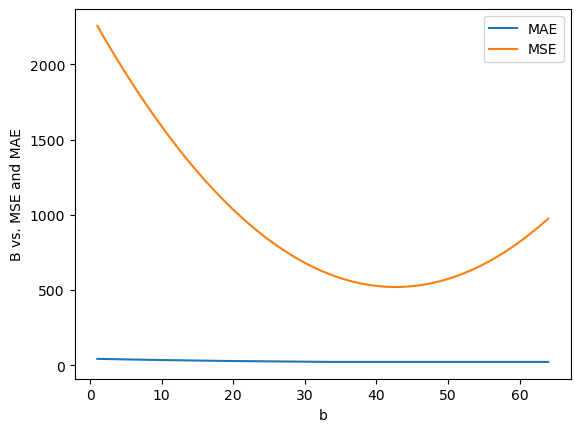

In [51]:
y = pd.concat([df_train['ROUND'],df_test['ROUND']],axis=0)

B = np.linspace(y.min(), y.max(), num = 10000)
mae = []
mse = []
for bias in B:
    mae.append(MAE(y, SimpleBiasRegressor(bias, len(y))))
    mse.append(MSE(y, SimpleBiasRegressor(bias, len(y))))

results = pd.DataFrame()
results['b'] = B
results['MAE'] = mae
results['MSE'] = mse

# TODO: plot the results
ax1 = results.plot.line(x='b',y='MAE')
results.plot.line(x='b',y='MSE',ax=ax1)
plt.ylabel('B vs. MSE and MAE')

In [52]:
results.iloc[results['MAE'].idxmin()]

b       32.005401
MAE     21.328125
MSE    633.462886
Name: 4921, dtype: float64

In [53]:
y.mean()

42.671875

In [54]:
y.value_counts()

ROUND
64    512
32    256
16    128
8      64
4      32
1      16
2      16
Name: count, dtype: int64

In [60]:
err = 1 - y.value_counts().max()/pd.concat([df_train,df_test],axis=0).shape[0]  # 0 # FIXME
print('baseline error rate',round(err,2))

baseline error rate 0.5
